# Notebook 7: Logistic Regression and SoftMax for MNIST

## Learning Goal

The goal of this notebook is to familiarize the reader with SoftMax regression (a generalization of logistic regression to more than two categories), categorical predictions, and the MNIST handwritten dataset. The reader will understand how to use the Scikit Logistic regression package and visualize learned weights.

## Overview
A paradigmatic example of SoftMax regression is the MNIST classification problem. The goal is to find a statistical model which recognizes the ten handwritten digits. There are numerous practical applications of such a task, pretty much anywhere one can imagine dealing with large quantities of numbers (postal services, banks, etc.).


Yann LeCun and collaborators collected and processed $70000$ handwritten digits to produce what became known as the most widely used database in ML, called [MNIST](http://yann.lecun.com/exdb/mnist/). Each handwritten digit comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem is a generic SoftMax regression task. 

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.

## Numerical Experiments

The reader is invited to check out the code below to build up their intuition about SoftMax regression. The following notebook is a slight modification of [this Scikit tutorial](http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) by Arthur Mensch on studying the MNIST problem using Logistic Regression.

In [1]:
import time
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

# load MNIST data
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Example run in 12.022 s
Sparsity with L2 penalty: 9.06%
Test score with L2 penalty: 0.8929


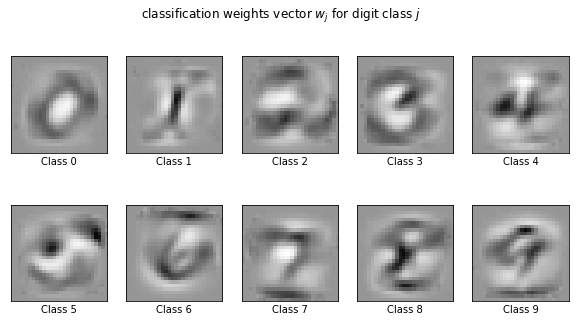

In [2]:
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

### Exercises: ###  
<ul>
<li> The snippet above invoked the "sag" solver which only deals with $L2$ regularization. Try another solver 'liblinear' in scikit that support $L1$ regularization. You can find more details on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>
<li> Visualize the misclassified samples. Comment out how logistic regression perform on MNIST.

<li> Try to vary the size of training set and see how that affects the accuracy.

<li>  [Theory] In this notebook, we consider a $K=10$ multi-class logistic regression (MLR). To generalize our discussion in the main text, we need the enlarge the output space to $\mathcal{Y}=\{0,1,\cdots, 9\}$. We also need to associate a weight vector to each of the 10 classes: $\boldsymbol{w}_k$, $k=0,\cdots, 9$. Note that in MNIST, $\boldsymbol{w}_k\in\mathbb{R}^{28^2+1}$. Consider the hypothesis:
$$
h_y(\boldsymbol{x}) = \frac{e^{\boldsymbol{w}_y^T \boldsymbol{x}}}{\sum_{y=0}^9 e^{\boldsymbol{w}_y^T \boldsymbol{x}}}
$$
Use this to construct the likelihood function $P(y|\boldsymbol{x})$.

<li> [Theory] Now consider we're given a set of i.i.d. data $\mathcal{D}=\{(\boldsymbol{x}_1,y_1),\cdots, (\boldsymbol{x}_n,y_n)\}$. As we argued in the main text, the cross-entropy error used in logistic regression is motivated by maximizing the likelihood (or more exactly, minimizing the negative log-likelihood), find the corresponding error function $E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9)$ in MLR using the hypothesis above. 

<li> [Theory] Use the error function derive above, calculate its gradient $\frac{\partial E}{\partial \boldsymbol{w}_k}$
</ul>
